In [1]:
from coders import FeatureFSK2 as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[6708] Lock acquired: 3


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 20, 0.2, 0.1)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 614/478/229
Gen average time: 0:00:11.834664
Gen 2 grades: 642/551/325
Gen average time: 0:00:09.234868
Gen 3 grades: 576/506/262
Gen average time: 0:00:08.805536
Gen 4 grades: 963/765/476
Gen average time: 0:00:07.881423
Gen 5 grades: 763/635/442
Gen average time: 0:00:07.268619
Gen 6 grades: 829/608/364
Gen average time: 0:00:06.203600
Gen 7 grades: 966/790/508
Gen average time: 0:00:05.958899
Gen 8 grades: 778/708/567
Gen average time: 0:00:05.222245
Gen 9 grades: 930/845/584
Gen average time: 0:00:05.095661
Gen 10 grades: 1131/851/620
Gen average time: 0:00:04.961832
Gen 11 grades: 1400/1149/766
Gen average time: 0:00:04.515887
Gen 12 grades: 1733/1514/895
Gen average time: 0:00:04.362716
Gen 13 grades: 1364/1130/710
Gen average time: 0:00:04.472330
Gen 14 grades: 1494/1271/933
Gen average time: 0:00:04.372672
Gen 15 grades: 1539/1351/878
Gen average time: 0:00:04.387794
Gen 16 grades: 1282/1134/742
Gen average time: 0:00:04.387497
Gen 17 grades: 1243/1024/659
Gen ave

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/FeatureFSK2_GA_2460679549056.pdf


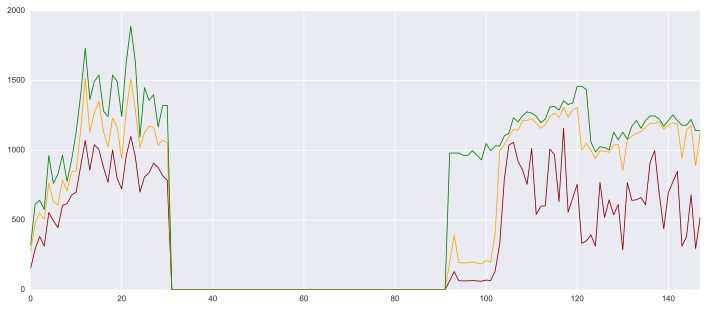

In [5]:
f = 'out/{}_GA_{}.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [6]:
for c in population._sort(10000):
    print(c)

FeatureFSK2:
    rate: 96000
    sqe_start: 0.7048654409621671
    peak_width_start: 0.2793222070290257
    sqe_end_v: 0.48685023049313725
    symbol_duration: 0.0016695881490214623
    symbol_width: 2
    frequency: 2047
    filter_std_base: 27
    filter_shape: 0.5660384683147803
    sqe_end: 0.0471588424851008
    amplitude: 0.9978916774892427
    filter_type: 1
    frequency_dev: 0.11691487597097745
    filter_std_scale: 0.30242457137149953
    peak_threshold: 0.2670409490160862
    filter_window_scale: 0.28386781165806774
    filter_window_base: 18
    peak_width_span: 0.3171803239088768
    sqe_start_v: 0.7166390638373508
FeatureFSK2:
    rate: 96000
    sqe_start: 0.7048654409621671
    peak_width_start: 0.26953105226680574
    sqe_end_v: 0.5266705890646651
    symbol_duration: 0.0016695881490214623
    symbol_width: 2
    frequency: 2047
    filter_std_base: 26
    filter_shape: 0.5660384683147803
    sqe_end: 0.040262053038755935
    amplitude: 0.888116136600265
    filter_typ

In [7]:
for c in population._sort(10000)[:3]:
    print(*coder_fitness(0, 3000)(c, raw=True))
    print(c)

1200.0 0.9806666666666667
FeatureFSK2:
    rate: 96000
    sqe_start: 0.7048654409621671
    peak_width_start: 0.2793222070290257
    sqe_end_v: 0.48685023049313725
    symbol_duration: 0.0016695881490214623
    symbol_width: 2
    frequency: 2047
    filter_std_base: 27
    filter_shape: 0.5660384683147803
    sqe_end: 0.0471588424851008
    amplitude: 0.9978916774892427
    filter_type: 1
    frequency_dev: 0.11691487597097745
    filter_std_scale: 0.30242457137149953
    peak_threshold: 0.2670409490160862
    filter_window_scale: 0.28386781165806774
    filter_window_base: 18
    peak_width_span: 0.3171803239088768
    sqe_start_v: 0.7166390638373508
1200.0 0.9836666666666667
FeatureFSK2:
    rate: 96000
    sqe_start: 0.7048654409621671
    peak_width_start: 0.26953105226680574
    sqe_end_v: 0.5266705890646651
    symbol_duration: 0.0016695881490214623
    symbol_width: 2
    frequency: 2047
    filter_std_base: 26
    filter_shape: 0.5660384683147803
    sqe_end: 0.04026205303875